### _Fourier Transform_
<br/>
In this demonstration, we shall see how Fourier transform can approximate an arbitrary signal sampled at different points in a specific interval.
Now it is assumed that the reader has some idea about Fourier transform. However, to refresh the memory, here is a simple explanation. 

Fourier transform can dissect an arbitrary signal to find its constituent basic signals. It does so by converting the original(usually time domain) signal to frequency domain. Meaning, it looks for dominant frequencies in the original signal. Then the original representation of the signal is converted to frequency representation. The two complementary equations that converts the original signal back and forth from time domain and frequency domain is given below: 
<br/><br/>
_Fourier transform_:  
<br/>
   >$X_k = \sum\limits_{n=0}^{N-1} = x_n * e^\frac{-2*\pi*i*k*n}{N}$

And the _Inverse Fourier transform_:  
>$x_n = \frac{1}{N} \sum\limits_{k=0}^{N-1} = X_k * e^\frac{2*\pi*i*k*n}{N}$
 
 An example calculation is in order. The vector we are working is: 
 >$[.3, .5, .7, .6]$
 
 Now, beginning the calculation:  
  
 >$X_0 = \sum\limits_{n=0}^{N-1} x_n  * e^\frac{-2\pi i *0* n}{N} = .3 * e^0 + .5 * e^0 + .7 * e^0 + .6 * e^0 = 2.1$  
  
Similarly:   

>$X_1 = \sum\limits_{n=0}^{N-1} x_n  * e^\frac{-2\pi i *1* n}{N} = .3 * e^{\frac{-2 * \pi * i * 1 * 0}{4}} + .5 * e^{\frac{-2 * \pi * i * 1 * 1}{4}} + .7 * e^{\frac{-2 * \pi * i * 1 * 2}{4}} + .6 * e^{\frac{-2 * \pi * i * 1 * 3}{4}}$  
 
 Now, from Euler's formula, we know that:  
 >$e^{i\theta} = cos(\theta) + i * sin(\theta)$  
 
 So our calculation continues as:    
 >$X_1 = \sum\limits_{n=0}^{N-1} x_n  * e^\frac{-2\pi i *1* n}{N} = .3 * cos(0) + i * sin(0) + .5 * cos(-\frac{\pi}{2}) + i * sin(-\frac{\pi}{2}) + \\ 
 .7 * cos(-\pi) + i * sin(-\pi) + .6 * cos(-\frac{3\pi}{2}) + i * sin(-\frac{3\pi}{2}) \\
 = .3 + (-.5 * i) + (-.7) + .6 * i = -0.4 + 0.1 * i$
 
The final result would be: 
>$[2.1 + 0i, -0.4 + 0.1i, -0.1 + 0j, -0.4 - 0.1i]$
 
First, let's see how two signals with different frequencies combines to create a new signal. 

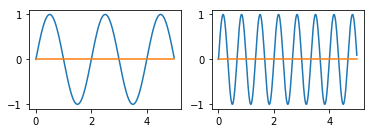

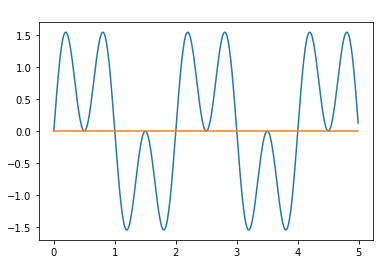

In [1]:
    import math
    import numpy as np
    import matplotlib.pyplot as plt
    from ipywidgets import interact
    %matplotlib inline  

    amplitude, frequency = 1, 1
    X= np.arange(0, 5, .01) # from 0 to 2 taking 500 points
    static = np.zeros(len(X))
    Y1 = amplitude * np.sin(np.pi * frequency * X) # signal with unit amplitude and frequency
    Y2 = amplitude * np.sin(np.pi * 3 * frequency * X) # signal with three times the unit frequency
    Y3 = Y1 + Y2  # combined signal
    fig1 = plt.figure()
    plt.subplot(2, 2, 1)
    plt.plot(X, Y1, X, static);    
    plt.subplot(2, 2, 2)
    plt.plot(X, Y2, X, static);  
    fig2= plt.figure()
    plt.plot(X, Y3, X, static);
    plt.title('Combined Signal', color='white');

We will approximate the resulting signal by Fourier transform. Now let's create two functions to help sample and plot the data points sampled from the original signal. 

In [2]:
def create_sample(X, Y, interval, n_values):
    """
    Sample from the signal with the given parameters.
    interval: every interval'th values. for example if the signal is: [1, 2, 3, 4, 5] and the period is
    2 then the sample would be: [1, 3, 5]
    n_values: How many values to take.
    """
    sample_x = X[0: len(X): interval][:n_values] # begin:end:period
    sample_y = Y[0: len(Y): interval][:n_values]
    return sample_x, sample_y
def plot_sample(sample_x, sample_y):    
    sx, sy = sample_x, sample_y
    plt.plot(sx, [0 for v in sx])
    plt.scatter(sx, sy, )
    for idx, val in zip(sx, sy):    
        plt.plot((idx, idx), (0, val), 'k-')
    plt.suptitle('Data sampled at intervals', color='white')
    plt.show()        

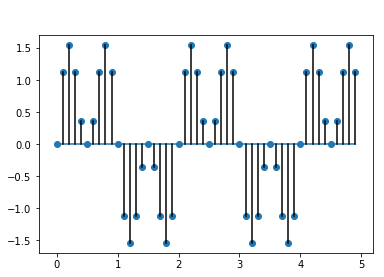

In [3]:
period, n_samples = 10, 100
sx, sy = create_sample(X, Y3, period, n_samples) # p3: period, p4: n_samples
plot_sample(sx, sy)


 Below the basic implementation of Fourier transform is presented. 


In [4]:
def fourier_transform(vector):
    res = []
    """Basic Fourier transform. This loop could be replaced with list comprehension too."""
    for k in range(len(vector)):
        a = sum([vector[i] * np.exp((-2 * np.pi * 1j * k * i) / len(vector)) for i in range(len(vector))])
        res.append(a)
    return res
def inverse_fourier_transform(vector):
    res = []
    for k in range(len(vector)):
        v = sum([vector[i] * np.exp((2 * np.pi * 1j * k * i) / len(vector)) for i in range(len(vector))])
        res.append(round(v / len(vector), 4))
    return res

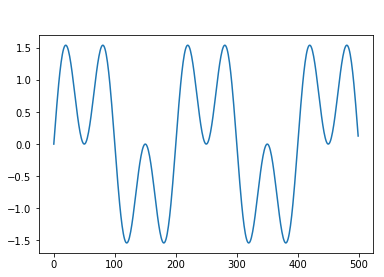

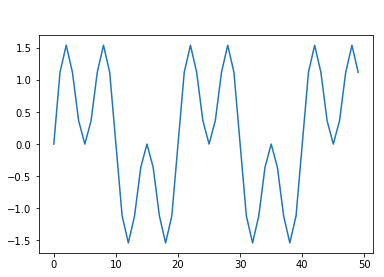

In [5]:
import warnings
warnings.filterwarnings('ignore')

res = fourier_transform(sy)  # sy: the sampled y values
main_fig = plt.figure()
main_fig.suptitle('Main Signal', fontsize=20, color='white')
plt.plot(Y3);  # original signal
ap_fig = plt.figure()
ap_fig.suptitle('Approximated(' + str(n_samples) + ' data points)', fontsize=20, color='white')
plt.plot(inverse_fourier_transform(fourier_transform(sy)));


Advanced algorithms exist that can calculate the Fourier transform much faster than the naive implementation.
  
\---------------------------------------------------------------------------------------------------------------------------------